In [1]:
# KNN 알고리즘: K-최근접이웃 알고리즘
# 붓꽃 데이터(iris) 사용
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [2]:
# ML 코딩 5단계
# 1. 훈련 데이터와 테스트 데이터로 분리 : (X_train, X_test), (y_train, y_test) = train_test_split(...)
# 2. 머신러닝 알고리즘 선택 : 예) KneighborsClassifier
# 3. 훈련 : model.fit(X_train, y_train)
# 4. 점수 : model.score(X_test, y_test)
# 5. 새 데이터로 예측 : 예) 새 붓꽃 정보로 품종 예측

In [3]:
# 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

array([[6.8, 2.8, 4.8, 1.4],
       [5.5, 4.2, 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [6.3, 3.3, 4.7, 1.6]])

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# 2
knn = KNeighborsClassifier()

# 3
knn.fit(X_train, y_train)

# 4
print("훈련 점수: ", knn.score(X_train, y_train))
print("테스트 점수: ", knn.score(X_test, y_test))

훈련 점수:  0.9703703703703703
테스트 점수:  0.9333333333333333


In [5]:
# 5
X_new = np.array([[5, 2.9, 1, 0.2]])
pred = knn.predict(X_new)
print("예측값:", pred)
print("예측한 품종:", iris['target_names'][pred])

예측값: [0]
예측한 품종: ['setosa']


w[0]: 0.393906  b: -0.031804


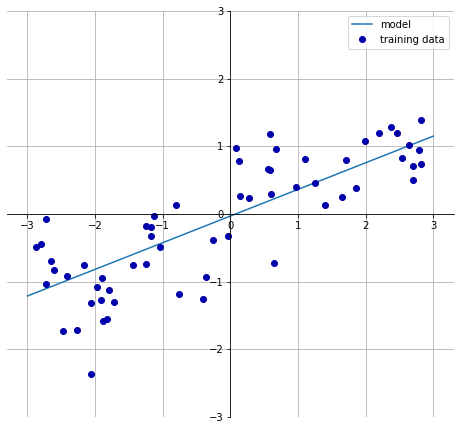

In [8]:
# mglearn 라이브러리 설치
# ! pip install mglearn
import mglearn

mglearn.plots.plot_linear_regression_wave() #시각화 linear: 직선의 regression: 값 예측

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=60)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
from sklearn.linear_model import LinearRegression  # 선형 회귀
lr = LinearRegression()

lr.fit(X_train, y_train)

print("훈련 점수:", lr.score(X_train, y_train))
print("테스트 점수:", lr.score(X_test, y_test))

print("기울기: ", lr.coef_)
print("절편: ", lr.intercept_)

훈련 점수: 0.6866326289832148
테스트 점수: 0.44891424457946516
기울기:  [0.39888156]
절편:  -0.02769171425657866


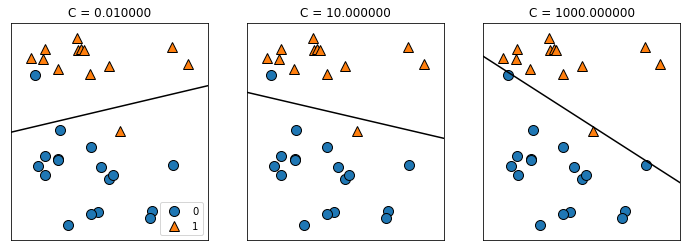

In [12]:
# SVM(Support Vector Machine): 지지하는 벡터(여러 점)을 기반으로 한 알고리즘
mglearn.plots.plot_linear_svc_regularization() # 시각화
# svc = support vector classifier(분류)

#그래프의 c = cost. 오버피팅 방지 (비용)

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.svm import SVC # SVM 알고리즘
svc = SVC()
svc.fit(X_train, y_train)

print("훈련 점수: ", svc.score(X_train, y_train)) #0.91
print("테스트 점수: ", svc.score(X_test, y_test)) #0.98 ==> 언더피팅

훈련 점수:  0.9140625
테스트 점수:  0.9824561403508771


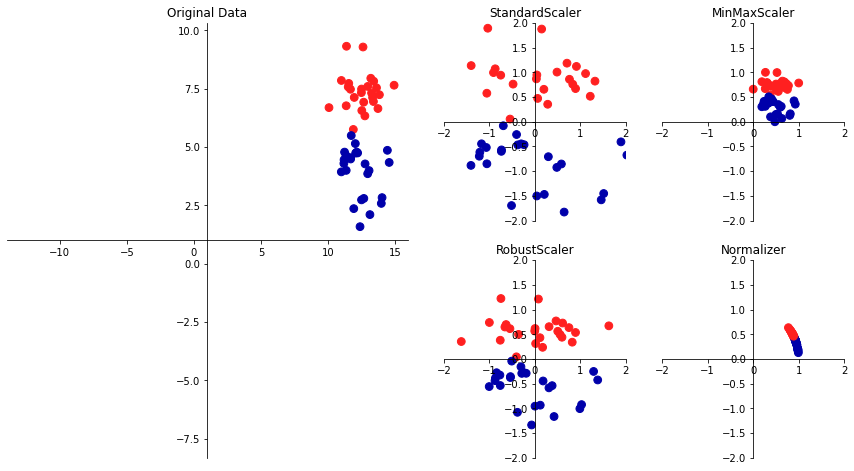

In [16]:
# 정규화(= 축소, 표준화) 처리
# 정규화 시각화
mglearn.plots.plot_scaling()

In [19]:
from sklearn.preprocessing import MinMaxScaler #Scaling

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:1]

array([[0.85846516, 0.51403449, 0.87907241, 0.73268686, 0.48451747,
        0.75799031, 0.78233365, 0.91699801, 0.38838384, 0.37615838,
        0.2845555 , 0.24615453, 0.31216133, 0.21142776, 0.21936295,
        0.41065581, 0.14469697, 0.38454253, 0.03894861, 0.17267803,
        0.7792559 , 0.57569296, 0.79919679, 0.58019055, 0.56877765,
        0.56301967, 0.5172524 , 0.98522337, 0.15572639, 0.32834842]])

In [20]:
# numpy float 출력 옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x:f"{x:0.3f}"})
X_train[:1]

array([[25.220, 24.910, 171.500, 1878.000, 0.106, 0.267, 0.334, 0.184,
        0.183, 0.068, 0.897, 1.474, 7.382, 120.000, 0.008, 0.057, 0.057,
        0.020, 0.011, 0.006, 30.000, 33.620, 211.700, 2562.000, 0.157,
        0.608, 0.648, 0.287, 0.235, 0.105]])

In [22]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 점수: ", svc.score(X_train_scaled, y_train)) #0.98
print("테스트 점수: ", svc.score(X_test_scaled, y_test)) #0.96 ==> 언더피팅 수정 완료

훈련 점수:  0.98046875
테스트 점수:  0.9649122807017544


In [24]:
# 앙상블 기법: 다수결
# RandomForest: 나무 여러 개를 랜덤으로 만들어서 합친 뒤 숲을 만들어서 다수결로 결정
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0, max_depth=4)
forest.fit(X_train, y_train)
print("훈련 점수:", forest.score(X_train, y_train)) # (without max depth)훈련 점수: 1.0 ==> overfitting
print("테스트 점수:", forest.score(X_test, y_test))

훈련 점수: 0.986328125
테스트 점수: 0.9649122807017544


In [ ]:
## ML 끝